Source of Data：http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
Specific Dataset(s)：
#### numeric variables: 10
#categorical variables：10
#samples: 45211 
multiple related table:  3
Independent Variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
Dependent variable (desired target):
21 -y - has the client subscribed a term deposit? (binary: 'yes','no')


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/project/bank-additional/bank-additional-full.csv',sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [4]:
df['y'].value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
print("There are 0 rows have missing value"+str(df[df.isnull().any(axis=1)].shape))

There are 0 rows have missing value(0, 21)


In [7]:
df.replace(to_replace={'y':'yes'}, value=1, inplace=True)
df.replace(to_replace={'y':'no'}, value=0, inplace=True)

In [8]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


#### Splite train and test data 

In [9]:
from sklearn.model_selection import train_test_split
target= df['y']
df_matrix=df.drop(columns='y')
df_matrix
dum_df=pd.get_dummies(df_matrix)
dum_df
                      
x_train, y_test, x_target, y_target = train_test_split(dum_df, target, test_size=0.20, random_state=42)

#### Dataframe to Numpy

In [10]:
print('Train:', x_train.mean(), 'Test:', x_target.mean())
print('Train:', y_test.mean(), 'Test:', y_target.mean())

Train: age                      40.017420
duration                257.746313
campaign                  2.572959
pdays                   962.745341
previous                  0.172989
                           ...    
day_of_week_tue           0.197663
day_of_week_wed           0.197360
poutcome_failure          0.103885
poutcome_nonexistent      0.863035
poutcome_success          0.033080
Length: 63, dtype: float64 Test: 0.11244309559939301
Train: age                      40.050619
duration                260.439670
campaign                  2.546128
pdays                   961.395970
previous                  0.172857
                           ...    
day_of_week_tue           0.191430
day_of_week_wed           0.197985
poutcome_failure          0.100631
poutcome_nonexistent      0.865016
poutcome_success          0.034353
Length: 63, dtype: float64 Test: 0.11349842194707453


In [11]:
#x_train, y_test, x_target, y_target

x_train= np.array(x_train)
#x_train
x_target=np.array(x_target)
#x_test
y_test= np.array(y_test)
#y_train
y_target=np.array(y_target)
#y_test.shape

## LogisticRegression

For the Logistic regression result. We compared the training accuracy and the testing accuracy for the normal without any regularization, L1 ​regularization, L2 regularization and ​Elastic-Net. Moreover, for our ​regularization, we also ​tested four different ​inverse of regularization strength numbers from C = [10, 1, 0.1, 0.001]. First, Our normal ​Logistic regression, we got ​training accuracy in 91.04 % and test accuracy in 91.05 %. Second, in L1 regularization, we picked C=10 to achieve best accuracy which is 91.14% in training accuracy and 91.11% in testing accuracy. Third, in L2 regularization, we picked C=0.001 to achieve best accuracy, and ​we got training accuracy in 90.87% and test accuracy in 91.06%. Last, in ​Elastic-Net, we also added one more penalty, ​l1_ratio, to find the sweet spot for L1 and L2​. There were five different values for l1_ratio [1,.5,.1,.01,.001], because ​l1_ratio should be be​tween 1 to 0. To get our best accuracy, we picked C= 0.001 and l1_ratio = 0.5, so ​we got ​training accuracy in 90.58% and test accuracy in 90.7%. Based on all our four models, although there was not a huge difference between all of them, because they all surrounded at 90% to 91%, we still finally chose L1 regularization to be
 
our better performance model which resulted in 91.11% testing accuracy. Furthermore, the Precision and recall both had high percent performance  and on the confusion matrix, general performed well, but for false positive, which was mean the client didn’t subscribed a term deposit, but classify as subscribed​, ​seems still had amount of number to be solved in future. Finally, in our ​L1 regularization ​ROC curve, it also showed that even if we raised up the thresholds, but we still could not fix the False Positive, it seemed to be flatten after the true positive rate over 0.9.

### Normal Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(penalty="none", solver = "lbfgs")
logreg.fit(x_train, x_target)
preds_train = logreg.predict(x_train)
preds_train.shape
#print(logreg.score(preds_test, y))
print('Coefficient of each feature: \n\n', logreg.coef_)
print('\nTraining accuracy:', logreg.score(x_train, x_target))
print('\nTest accuracy:', logreg.score(y_test, y_target))

Coefficient of each feature: 

 [[ 2.40134184e-03  4.52024398e-03  3.37600996e-02 -1.52279657e-03
  -9.09315229e-02 -1.86501857e-01  4.37889068e-01  3.82835735e-02
  -2.12979105e-01 -8.05410854e-03  6.15996550e-02 -1.22324867e-01
  -8.82190582e-03 -3.07771318e-03  2.22593998e-03  4.11607729e-02
  -8.52538627e-03 -3.44845211e-02  3.04195086e-02  3.88289382e-02
   8.72279066e-03 -2.06721221e-03  3.08873364e-04 -6.94751945e-02
   7.36920463e-02 -8.69725387e-04 -2.18733169e-02 -1.89006832e-02
  -6.06789219e-02 -3.55548535e-02  5.66848045e-04  9.57163283e-03
   1.26375762e-01  4.14953208e-03  1.01327287e-01 -9.76279757e-02
  -4.33116807e-05 -1.90686530e-03  7.79500695e-04  4.78336434e-03
   1.06040501e-02  7.79500695e-04 -7.72755108e-03  1.35736144e-01
  -1.32080144e-01  2.41459019e-02  5.34851459e-02  1.85943591e-03
   9.26637239e-02  7.65631283e-02  1.02344949e-01 -3.58336357e-01
  -2.27138477e-02  2.97529017e-02  3.89101829e-03 -2.56886542e-02
  -3.59201795e-02  1.32373947e-02  3.2397623

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(preds_train, x_target))
logregtraincm = confusion_matrix(preds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", logregtraincm)
# predict test data
preds_test = logreg.predict(y_test)
#preds_test.shape
print(classification_report(preds_test, y_target))
logregtestcm = confusion_matrix(preds_test, y_target)
print("Predict Testing Data with Actual Testing Data: \n" ,logregtestcm)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30662
           1       0.41      0.66      0.51      2288

    accuracy                           0.91     32950
   macro avg       0.69      0.80      0.73     32950
weighted avg       0.93      0.91      0.92     32950

Predict Training Data with Actual Training Data: 
 [[28478  2184]
 [  767  1521]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7662
           1       0.41      0.67      0.51       576

    accuracy                           0.91      8238
   macro avg       0.69      0.80      0.73      8238
weighted avg       0.93      0.91      0.92      8238

Predict Testing Data with Actual Testing Data: 
 [[7114  548]
 [ 189  387]]


In [14]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(title+'png')
    plt.show()


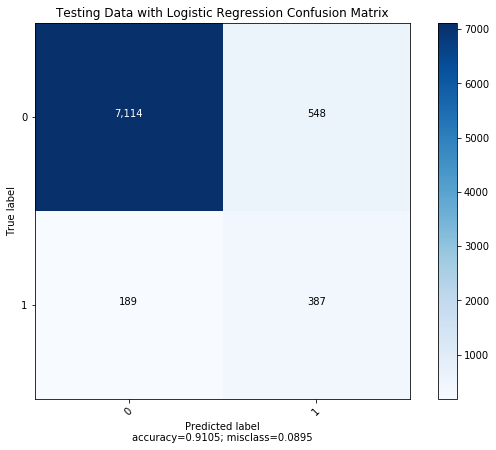

In [15]:
plot_confusion_matrix(cm = logregtestcm, 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Testing Data with Logistic Regression Confusion Matrix")

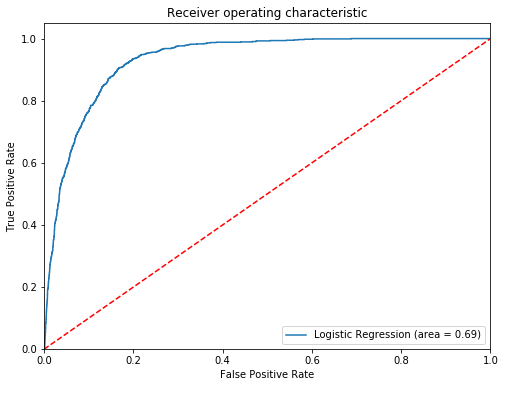

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_target, logreg.predict(y_test))
fpr, tpr, thresholds = roc_curve(y_target, logreg.predict_proba(y_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#print(thresholds)

### L1 regularization

In [17]:
C = [10, 1, .1, .001]

for c in C:
    logregL1=LogisticRegression(penalty='l1', C=c, solver='liblinear')
    logregL1.fit(x_train, x_target)
    preds_test = logregL1.predict(x_train)
    print('C:', c)
    #print('Coefficient of each feature:', logregL1.coef_)
    print('Training accuracy:', logregL1.score(x_train, x_target))
    print('Test accuracy:', logregL1.score(y_test, y_target))
    #preds_test.shape
    #print(logreg.score(preds_test, y))
    #logregL1.score(x, y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 10
Training accuracy: 0.9114719271623672
Test accuracy: 0.9112648701141054


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 1
Training accuracy: 0.9114415781487102
Test accuracy: 0.9110220927409566


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 0.1
Training accuracy: 0.9112594840667678
Test accuracy: 0.9106579266812334
C: 0.001
Training accuracy: 0.9069499241274659
Test accuracy: 0.906409322651129


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
logregL1=LogisticRegression(penalty='l1', C=10, solver='liblinear')
logregL1.fit(x_train, x_target)
logregL1_preds_train = logregL1.predict(x_train)
print('C:', "10")
print('Coefficient of each feature:', logregL1.coef_)
print('\n-------------------------------------------------------------------------\n')
print('Training accuracy:', logregL1.score(x_train, x_target))

    #preds_test.shape
    #print(logreg.score(preds_test, y))
    #logregL1.score(x, y)

print(classification_report(logregL1_preds_train, x_target))
logreglogregL1traincm = confusion_matrix(logregL1_preds_train, x_target)

print("Predict Training Data with Actual Training Data: \n", logreglogregL1traincm)
print('\n-------------------------------------------------------------------------\n')

print('Test accuracy:', logregL1.score(y_test, y_target))
# predict test data
logregL1preds_test = logregL1.predict(y_test)
#preds_test.shape
print(classification_report(logregL1preds_test, y_target))
logregL1testcm = confusion_matrix(logregL1preds_test, y_target)
print("Predict Testing Data with Actual Testing Data: \n" ,logregL1testcm)

C: 10
Coefficient of each feature: [[ 1.15458973e-03  4.62959306e-03 -5.55156863e-02 -1.08829583e-03
   5.33099282e-02 -1.82957483e-01  1.43076315e-01  1.95747033e-02
  -3.54676496e-01 -2.83966273e-03  8.17236455e-02 -1.54155133e-01
  -6.89291359e-02  0.00000000e+00  5.26198804e-04  3.28497121e-01
  -2.07494054e-01 -3.71347082e-02  3.05647421e-01  1.33395343e-01
   1.50182033e-01 -1.19366202e-01  2.70869244e-02  0.00000000e+00
   5.14946150e-02 -3.81910088e-02  0.00000000e+00  8.95559823e-02
  -2.52467591e-02 -2.82087919e-02  6.60820616e-01 -4.65158426e-03
   1.70945944e-01  3.84327849e-02  3.03259236e-01  0.00000000e+00
   0.00000000e+00  3.63299635e-03  0.00000000e+00 -1.54785769e-02
   2.69462204e-04  0.00000000e+00 -3.53606722e-02  2.57216406e-01
  -7.44611710e-05 -1.84980838e-01  1.26373076e-01  0.00000000e+00
   2.55633081e-01  3.10448465e-01  1.36976416e+00 -9.00717887e-01
  -2.36395162e-01  3.13662932e-01 -2.99382605e-02 -7.94999058e-02
  -1.66889121e-01  0.00000000e+00  5.2924

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


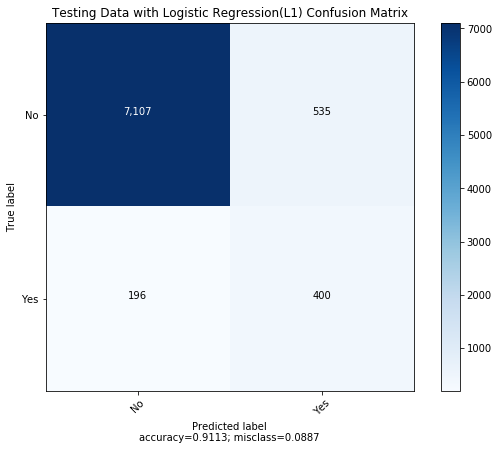

In [19]:
plot_confusion_matrix(cm = logregL1testcm, 
                      normalize    = False,
                      target_names =  ['No', 'Yes'],
                      title        = "Testing Data with Logistic Regression(L1) Confusion Matrix")

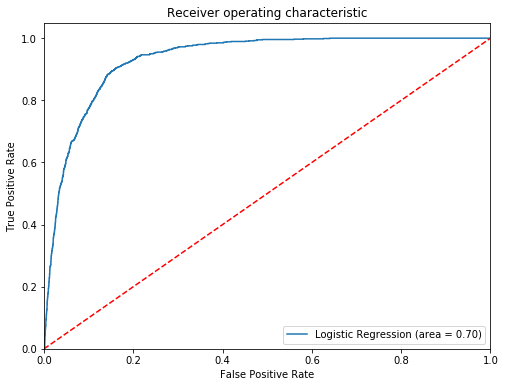

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_target, logregL1.predict(y_test))
fpr, tpr, thresholds = roc_curve(y_target, logregL1.predict_proba(y_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### L2 regularization

In [21]:
C = [10, 1, .1, .001]

for c in C:
    logregL2=LogisticRegression(penalty='l2', C=c, solver='lbfgs')
    logregL2.fit(x_train, x_target)
    preds_test = logregL2.predict(x_train)
    print('C:', c)
    print('Coefficient of each feature:', logregL2.coef_)
    print('Training accuracy:', logregL2.score(x_train, x_target))
    print('Test accuracy:', logregL2.score(y_test, y_target))
    print('')
    #preds_test.shape
    #print(logreg.score(preds_test, y))
    #logregL1.score(x, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C: 10
Coefficient of each feature: [[ 1.04457453e-03  4.57360194e-03  2.68427498e-02 -1.59270283e-03
  -8.41902972e-02 -1.91378892e-01  4.23277205e-01  2.68981948e-02
  -2.17781833e-01 -7.85508994e-03  5.85265422e-02 -1.16021898e-01
  -8.38415157e-03 -2.97031707e-03  2.08548192e-03  3.91280013e-02
  -8.07982232e-03 -3.26699385e-02  2.90440865e-02  3.66196382e-02
   8.27901112e-03 -1.96256597e-03  1.90822591e-04 -6.61777482e-02
   7.04027254e-02 -8.21731927e-04 -2.08209974e-02 -1.79481813e-02
  -5.75248922e-02 -3.35071672e-02  5.35960702e-04  9.02964371e-03
   1.19866449e-01  3.96325263e-03  9.68538586e-02 -9.32185071e-02
  -4.12837436e-05 -2.01576370e-03  7.53542363e-04  4.85628917e-03
   1.01842035e-02  7.53542363e-04 -7.34367804e-03  1.30268641e-01
  -1.26674573e-01  2.36038866e-02  5.01555140e-02  1.86014122e-03
   8.66721967e-02  7.20966882e-02  9.69644283e-02 -3.38706564e-01
  -2.15721341e-02  2.85148313e-02  4.00507996e-03 -2.42041231e-02
  -3.39488716e-02  1.26553324e-02  3.0617

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C: 1
Coefficient of each feature: [[-1.07164596e-02  4.31844278e-03 -3.73808271e-02 -1.50406463e-03
  -2.74130532e-02 -2.55987394e-01  3.18795735e-01  3.68131479e-02
  -2.78542355e-01 -5.72352693e-03  3.47038003e-02 -6.68093417e-02
  -5.00458878e-03 -2.10521897e-03  9.88812141e-04  2.32871564e-02
  -4.47885227e-03 -1.84566037e-02  1.87282502e-02  1.87267640e-02
   4.82637521e-03 -1.08432288e-03 -1.16625364e-03 -4.04613534e-02
   4.53864545e-02 -4.36617565e-04 -1.26663335e-02 -1.06019161e-02
  -3.28841821e-02 -1.69821115e-02  2.86216167e-04  4.62604069e-03
   6.88472850e-02  2.69723125e-03  6.27239941e-02 -5.93766087e-02
  -2.51554779e-05 -2.96333267e-03  5.88698826e-04  5.69686375e-03
   7.09822913e-03  5.88698826e-04 -4.36469805e-03  8.72350044e-02
  -8.39127745e-02  1.83423603e-02  2.50112149e-02  2.29019016e-03
   3.64453834e-02  3.53152244e-02  5.36654391e-02 -1.81903240e-01
  -1.21656722e-02  2.00719944e-02  6.24933519e-03 -1.20739207e-02
  -1.82954411e-02  7.86683267e-03  1.66363

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C: 0.1
Coefficient of each feature: [[ 2.36734704e-03  4.51070182e-03 -7.55566024e-02 -1.63524169e-03
   1.68379522e-02 -2.56107287e-01  1.90188588e-01  4.76684583e-02
  -2.71562309e-01 -3.36347941e-03  1.20083386e-02 -2.09812001e-02
  -1.77531932e-03 -1.10249502e-03  8.43274749e-05  8.39264475e-03
  -1.18443791e-03 -5.39922805e-03  8.24706840e-03  2.95515245e-03
   1.58043095e-03 -2.73540263e-04 -1.82513154e-03 -1.52738583e-02
   1.97418673e-02 -9.11354330e-05 -4.63757245e-03 -3.65368850e-03
  -1.00508555e-02 -2.60952593e-03  6.33632978e-05  7.41385101e-04
   2.13144488e-02  1.38418720e-03  2.79009399e-02 -2.53396869e-02
  -9.51097335e-06 -3.07598036e-03  3.72395492e-04  5.25532689e-03
   3.71838236e-03  3.72395492e-04 -1.53903583e-03  4.18411617e-02
  -3.92894197e-02  1.13038975e-02  3.36047443e-03  2.21312568e-03
  -4.91792016e-03  3.51566616e-03  1.41366131e-02 -4.11705957e-02
  -3.44343664e-03  1.07680657e-02  6.78585195e-03 -1.51692396e-03
  -4.20561143e-03  3.11410676e-03  4.042

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
from sklearn.model_selection import KFold
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    #plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001 Train = 0.9089605462822459 Test = 0.9090136570561457


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1.1119999999999999 Train = 0.909104704097117 Test = 0.9089529590288317


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 2.223 Train = 0.9090212443095599 Test = 0.9089833080424887


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 3.334 Train = 0.9086646433990895 Test = 0.9084066767830045


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 4.445 Train = 0.9093550834597875 Test = 0.9093171471927162


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 5.556 Train = 0.9096889226100153 Test = 0.9093171471927162


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 6.667000000000001 Train = 0.9100075872534141 Test = 0.910227617602428


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 7.7780000000000005 Train = 0.9099241274658574 Test = 0.9101062215477999


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 8.889 Train = 0.9098027314112291 Test = 0.909104704097117


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10.0 Train = 0.9093247344461306 Test = 0.9089833080424887


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(array([0.90896055, 0.9091047 , 0.90902124, 0.90866464, 0.90935508,
        0.90968892, 0.91000759, 0.90992413, 0.90980273, 0.90932473]),
 array([0.90901366, 0.90895296, 0.90898331, 0.90840668, 0.90931715,
        0.90931715, 0.91022762, 0.91010622, 0.9091047 , 0.90898331]))

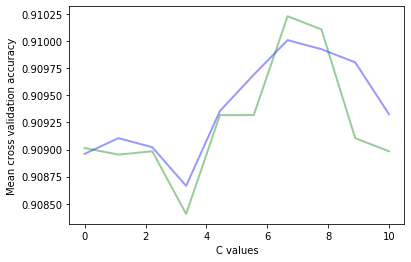

In [23]:
#C = [10, 1, .1, .001]
C=np.linspace(0.001, 10.0, num=10)
C
logregL2=LogisticRegression(penalty='l2',solver='lbfgs')
calc_params(x_train, x_target, logregL2, C, 'C', 5)

In [25]:
logregL2=LogisticRegression(penalty='l2', C=7.7780, solver='lbfgs')
logregL2.fit(x_train, x_target)
preds_test = logregL2.predict(x_train)
print('C:', 7.7780)
#print('Coefficient of each feature:', logregL2.coef_)
print('Training accuracy:', logregL2.score(x_train, x_target))
print('Test accuracy:', logregL2.score(y_test, y_target))
print('')

C: 7.778
Training accuracy: 0.9099241274658574
Test accuracy: 0.9094440398154892



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Elasticnet regularization

In [27]:
C = [10, 1, .1, .001]
L1 = [1,.5,.1,.01,.001]

for c in C: 
    for lr  in L1:
        logregEN=LogisticRegression(penalty='elasticnet', C=c, solver='saga', l1_ratio=lr)
        logregEN.fit(x_train, x_target)
        preds_test = logregEN.predict(x_train)
        print('C:', c)
        print("l1_ratio",lr)
        #print('Coefficient of each feature:', logregEN.coef_)
        print('Training accuracy:', logregEN.score(x_train, x_target))
        print('Test accuracy:', logregEN.score(y_test, y_target))
        print('')
        #preds_test.shape
        #print(logreg.score(preds_test, y))
        #logregL1.score(x, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10
l1_ratio 1
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10
l1_ratio 0.5
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10
l1_ratio 0.1
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10
l1_ratio 0.01
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 10
l1_ratio 0.001
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1
l1_ratio 1
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1
l1_ratio 0.5
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1
l1_ratio 0.1
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1
l1_ratio 0.01
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 1
l1_ratio 0.001
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.1
l1_ratio 1
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.1
l1_ratio 0.5
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.1
l1_ratio 0.1
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.1
l1_ratio 0.01
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.1
l1_ratio 0.001
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.001
l1_ratio 1
Training accuracy: 0.9060091047040971
Test accuracy: 0.9066521000242778



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.001
l1_ratio 0.5
Training accuracy: 0.9058877086494689
Test accuracy: 0.907016266084001



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.001
l1_ratio 0.1
Training accuracy: 0.9057359635811836
Test accuracy: 0.9073804321437242



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C: 0.001
l1_ratio 0.01
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754

C: 0.001
l1_ratio 0.001
Training accuracy: 0.9057056145675265
Test accuracy: 0.9071376547705754



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Naive Bayes

For the Naive Bayes result. There were not many penalties in the scikit-learn package so we just used the default setting and calculated the probability to classify the data. Our model performed 86% accuracy in testing data and training dataset. It was not really well performance which compared to Logistic and LAD, but we will see after using dimensionality reduction techniques, PCA, Naive Bayes model has some improvement. In the Precision and recall both still had high percent performance and on the confusion matrix, general performed well, but for false positive, which meant the client didn’t subscribed a term deposit, but classify as subscribed, seems still have amount of number to be solved in future and also similarly to the false negative. Finally, in our Naive Bayes ROC curve, it seemed to be flatten after the true positive rate over 0.8.

In [29]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()
nbclf = nbclf.fit(x_train, x_target)
nbpreds_train = nbclf.predict(x_train)
#print('Coefficient of each feature:', nbclf.get_params())
print(" \nNaive Bayes ")
print('\n-------------------------------------------------------------------------')
print('Training accuracy:', nbclf.score(x_train, x_target))

print(classification_report(nbpreds_train, x_target))
nbtraincm = confusion_matrix(nbpreds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", nbtraincm)

print('\n-------------------------------------------------------------------------')
nbpreds_test = nbclf.predict(y_test)
print('Test accuracy:', nbclf.score(y_test, y_target))
print('')
print(classification_report(nbpreds_test, y_target))
nbtestcm = confusion_matrix(nbpreds_test, y_target)
print("Predict Test Data with Actual Test Data: \n", nbtestcm)

 
Naive Bayes 

-------------------------------------------------------------------------
Training accuracy: 0.8640060698027314
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     28318
           1       0.52      0.42      0.46      4632

    accuracy                           0.86     32950
   macro avg       0.71      0.68      0.69     32950
weighted avg       0.85      0.86      0.86     32950

Predict Training Data with Actual Training Data: 
 [[26541  1777]
 [ 2704  1928]]

-------------------------------------------------------------------------
Test accuracy: 0.864530225782957

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7083
           1       0.52      0.42      0.47      1155

    accuracy                           0.86      8238
   macro avg       0.71      0.68      0.69      8238
weighted avg       0.85      0.86      0.86      8238

Predict Test Data with Actu

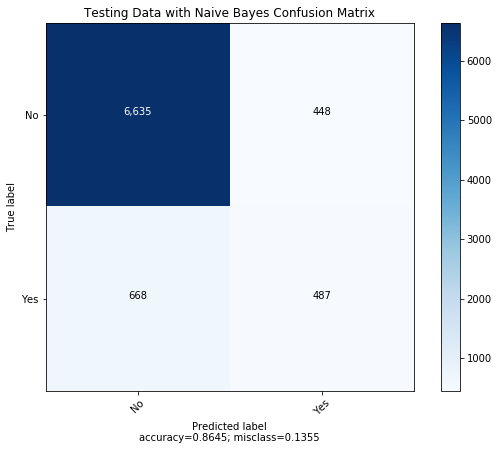

In [30]:
plot_confusion_matrix(cm = nbtestcm, 
                      normalize    = False,
                      target_names =  ['No', 'Yes'],
                      title        = "Testing Data with Naive Bayes Confusion Matrix")

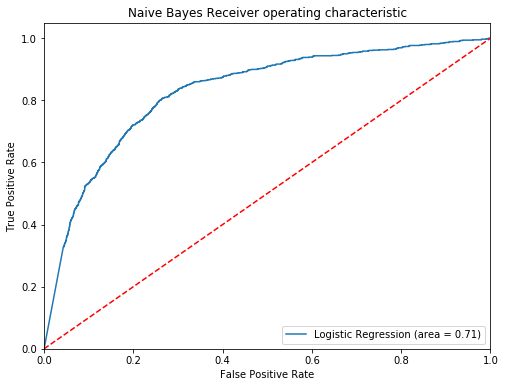

In [32]:
logit_roc_auc = roc_auc_score(y_target, nbclf.predict(y_test))
fpr, tpr, thresholds = roc_curve(y_target, nbclf.predict_proba(y_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## LDA
For the Linear Discriminant Analysis result. Linear Discriminant Analysis focused on separate differences in the classes of data by creating new axes. Our model performed 90.9 % accuracy in training data and 90.8 % accuracy in testing dataset. Furthermore, the Precision and recall both had high percent performance and on the confusion matrix, general performed well, but for false positive, which meant the client didn’t subscribe to a term deposit, but classify as subscribed, and seemed still can be improved in future. Finally, in our Linear Discriminant Analysis ROC curve, it also showed that even if we raise up the thresholds, we still could not fix the False Positive, it seemed to be flatten after the true positive rate over 0.9.

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(x_train, x_target)
ldpreds_train = ldclf.predict(x_train)

print("\nLinear Discriminant Analysis")
print('\n-------------------------------------------------------------------------')

print('Training accuracy:', ldclf.score(x_train, x_target))
print('')
print(classification_report(ldpreds_train, x_target))
ldtraincm = confusion_matrix(ldpreds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", ldtraincm)

print('\n-------------------------------------------------------------------------')

ldpre_test = ldclf.predict(y_test)
print('\nTest accuracy:', ldclf.score(y_test, y_target))
print('')
print(classification_report(ldpre_test, y_target))
ldtestcm = confusion_matrix(ldpre_test, y_target)
print("Predict Test Data with Actual Test Data: \n", ldtestcm)


Linear Discriminant Analysis

-------------------------------------------------------------------------
Training accuracy: 0.9098330804248862

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     29906
           1       0.51      0.62      0.56      3044

    accuracy                           0.91     32950
   macro avg       0.74      0.78      0.75     32950
weighted avg       0.92      0.91      0.91     32950

Predict Training Data with Actual Training Data: 
 [[28090  1816]
 [ 1155  1889]]

-------------------------------------------------------------------------

Test accuracy: 0.9085943190094683

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7458
           1       0.51      0.62      0.56       780

    accuracy                           0.91      8238
   macro avg       0.74      0.78      0.75      8238
weighted avg       0.92      0.91      0.91      8238

Predict T

/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


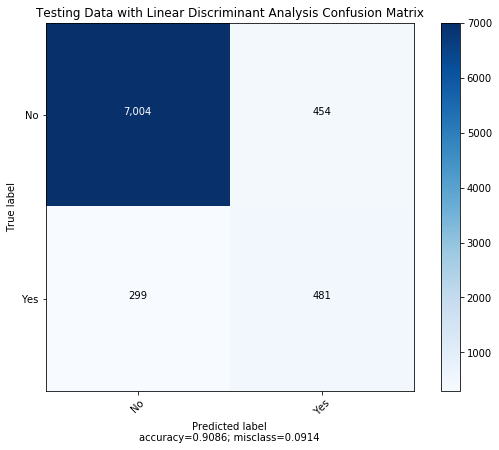

In [34]:
plot_confusion_matrix(cm = ldtestcm, 
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Testing Data with Linear Discriminant Analysis Confusion Matrix")

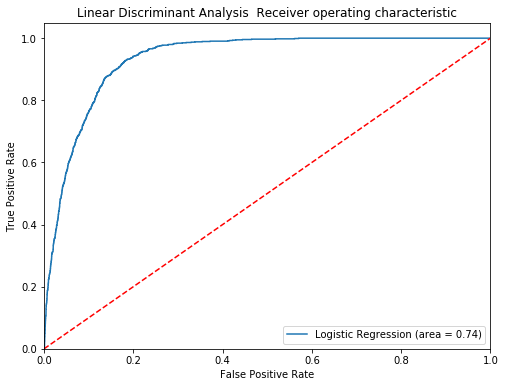

In [36]:
logit_roc_auc = roc_auc_score(y_target, ldclf.predict(y_test))
fpr, tpr, thresholds = roc_curve(y_target, ldclf.predict_proba(y_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Discriminant Analysis  Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## PCA

Since we had 63 columns after we created the dummy variables in our variables, we decided to use principal components analysis, which was dimensionality reduction technique. First we did min-max normalization on our data, then we could compare with and without normalization performance. In normalization, Principal Component Number had around 30 components to satisfy 95% representation of data, but surprisingly, without normalization, Principal Component Number just had 3 components that could satisfy 99% representation of data. Because of the dimensionality much less than the other, we decided to use original data to PCA  in 3 components. Second, we used the PCA matrix to redo our three classifications again. Each of the models had quite similar accuracy to using original data. For Logistic Regression, we used  L1 regularization Logistic Regression and inverse of regularization strength to 10, and we got 90.6% accuracy on training data and 90.8% accuracy on test data, so we discovered that the original dataset performs better accuracy. For Naive Bayes, we got 90.6% accuracy on training data and test data. Furthermore, in the Naive Bayes model, we improved 4% accuracy on both training and testing. In the Precision and recall both raised up performance and on the confusion matrix, we lowered down the true negative, which meant the client did subscribe to a term deposit, but classify as not subscribed. Yet, in our Naive Bayes ROC curve, it raised its threshold and became flatten after the true positive rate over 0.9, just like L1 regularization Logistic Regression. Last model, Linear Discriminant Analysis had similar results but not better. We got 90.4% accuracy on training data and 90.6% accuracy on test data. Based on our discovery,  principal components analysis could help us use less dimensions and still predict decent accuracy for our data.

In [84]:
#(x_train, x_target)

from sklearn import decomposition

pca = decomposition.PCA(n_components=63)
# n_components=19 
#[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0. 0.   0.   0.   0.   0.  ]
# so we pick n_components = 7, at least 95% 
x_train_pca = pca.fit_transform(x_train)

np.set_printoptions(precision=19,suppress=True)

print(x_train_pca)

[[-167.33314438331996       -32.279163387333845      -52.98919161911962      ...    0.0000000000004100536
    -0.0000000000003449292    0.000000000000451606 ]
 [-142.69652044967975       -13.216202557502816       74.22191278921609      ...    0.0000000000001162137
     0.0000000000002024423    0.0000000000000085259]
 [-245.35707017032382        -4.821841568494809       75.04524066380137      ...   -0.0000000000000239399
    -0.0000000000000824513    0.0000000000000344698]
 ...
 [  14.921197243779384      972.3155959032063         -8.066736520711425     ...   -0.0000000000000043799
    -0.0000000000000013658    0.000000000000005987 ]
 [  33.77970604827789       -42.53410563168605       -18.057527646362153     ...   -0.0000000000000041507
    -0.0000000000000101209    0.0000000000000016963]
 [  70.87560254423516       -51.64114716502839       -54.888777120027484     ...    0.0000000000000025817
    -0.0000000000000003625    0.0000000000000016618]]


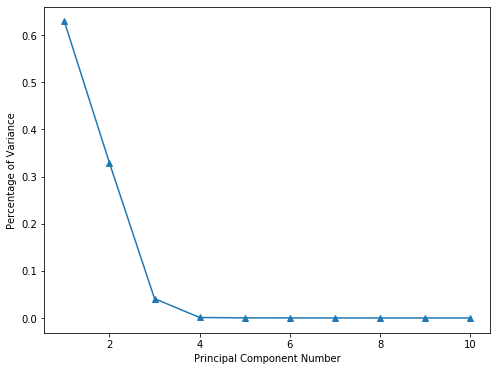

Top three PCA can perform: 99.8662700492688 percentage of Variance


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()
print("Top three PCA can perform: {} percentage of Variance".format(sum(pca.explained_variance_ratio_[:3])*100))

#### Top Three Pca can represent 99% of the data 

In [94]:
# so we pick n_components = 7, at least 99% 

pca = decomposition.PCA(n_components=3)

x_train_pca = pca.fit_transform(x_train)

np.set_printoptions(precision=3,suppress=True,linewidth=120)

print(x_train_pca)

print("\n Training data PCA can perform: {} percentage of variance. \n".format(sum(pca.explained_variance_ratio_)*100))

pca = decomposition.PCA(n_components=3)

y_test_pca = pca.fit_transform(y_test)

np.set_printoptions(precision=3,suppress=True,linewidth=120)

print(y_test_pca)

print("\n Test data PCA can perform: {} percentage of variance. \n".format(sum(pca.explained_variance_ratio_)*100))


[[-167.333  -32.279  -52.989]
 [-142.697  -13.216   74.222]
 [-245.357   -4.822   75.045]
 ...
 [  14.921  972.316   -8.067]
 [  33.78   -42.534  -18.058]
 [  70.876  -51.641  -54.889]]

 Training data PCA can perform: 99.86627004926868 percentage of variance. 

[[ 109.258  -32.37    72.513]
 [  22.209  -42.231  -18.081]
 [-209.266  -14.93    73.816]
 ...
 [-119.407  -19.853   73.406]
 [1062.155 -105.222  -58.979]
 [ -71.649  -37.078  -17.683]]

 Test data PCA can perform: 99.86856515530388 percentage of variance. 



In [95]:
logreg=LogisticRegression(penalty="none", solver = "lbfgs")
logreg.fit(x_train_pca, x_target)
preds_train = logreg.predict(x_train_pca)
print(preds_train)
#print(logreg.score(preds_test, y))
print('Coefficient of each feature: \n\n', logreg.coef_)
print('\nTraining accuracy:', logreg.score(x_train_pca, x_target))
print('\nTest accuracy:', logreg.score(y_test_pca, y_target))

[0 0 0 ... 1 0 0]
Coefficient of each feature: 

 [[0.005 0.003 0.014]]

Training accuracy: 0.9069195751138088

Test accuracy: 0.9081087642631707


In [96]:
PCAlogregL1=LogisticRegression(penalty='l1', C=10, solver='liblinear')
PCAlogregL1.fit(x_train_pca, x_target)
PCAlogregL1_preds_train = PCAlogregL1.predict(x_train_pca)

print('C:', "10\n")
print('Coefficient of each feature:', PCAlogregL1.coef_)
print('\n-------------------------------------------------------------------------\n')
print('Training accuracy:', PCAlogregL1.score(x_train_pca, x_target))

    #preds_test.shape
    #print(logreg.score(preds_test, y))
    #logregL1.score(x, y)

print(classification_report(PCAlogregL1_preds_train, x_target))
PCAlogreglogregL1traincm = confusion_matrix(PCAlogregL1_preds_train, x_target)

print("Predict Training Data with Actual Training Data: \n", PCAlogreglogregL1traincm)
print('\n-------------------------------------------------------------------------\n')

print('Test accuracy:', PCAlogregL1.score(y_test_pca, y_target))
# predict test data
PCAlogregL1preds_test = PCAlogregL1.predict(y_test_pca)
#preds_test.shape
print(classification_report(PCAlogregL1preds_test, y_target))
PCAlogregL1testcm = confusion_matrix(PCAlogregL1preds_test, y_target)
print("Predict Testing Data with Actual Testing Data: \n" ,PCAlogregL1testcm)

C: 10

Coefficient of each feature: [[0.005 0.003 0.014]]

-------------------------------------------------------------------------

Training accuracy: 0.9069195751138088
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     30856
           1       0.37      0.65      0.47      2094

    accuracy                           0.91     32950
   macro avg       0.67      0.79      0.71     32950
weighted avg       0.94      0.91      0.92     32950

Predict Training Data with Actual Training Data: 
 [[28517  2339]
 [  728  1366]]

-------------------------------------------------------------------------

Test accuracy: 0.9081087642631707
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7700
           1       0.38      0.67      0.49       538

    accuracy                           0.91      8238
   macro avg       0.68      0.80      0.72      8238
weighted avg       0.94      0.91    

#### GaussianNB

In [97]:
nbclf = GaussianNB()
nbclf = nbclf.fit(x_train_pca, x_target)
nbpreds_train = nbclf.predict(x_train_pca)
#print('Coefficient of each feature:', nbclf.get_params())
print(" \nNaive Bayes with PCA ")
print('\n-------------------------------------------------------------------------')
print('Training accuracy:', nbclf.score(x_train_pca, x_target))
print('')

nbpreds_test = nbclf.predict(y_test_pca)
print(classification_report(nbpreds_train, x_target))
nbtraincm = confusion_matrix(nbpreds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", nbtraincm)

print('\n-------------------------------------------------------------------------')
print('Test accuracy:', nbclf.score(y_test_pca, y_target))
print(classification_report(nbpreds_test, y_target))
nbtestcm = confusion_matrix(nbpreds_test, y_target)
print("Predict Test Data with Actual Test Data: \n", nbtestcm)


 
Naive Bayes with PCA 

-------------------------------------------------------------------------
Training accuracy: 0.9045220030349014

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30475
           1       0.41      0.61      0.49      2475

    accuracy                           0.90     32950
   macro avg       0.69      0.77      0.72     32950
weighted avg       0.93      0.90      0.91     32950

Predict Training Data with Actual Training Data: 
 [[28287  2188]
 [  958  1517]]

-------------------------------------------------------------------------
Test accuracy: 0.9047098810390871
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7606
           1       0.42      0.62      0.50       632

    accuracy                           0.90      8238
   macro avg       0.69      0.77      0.72      8238
weighted avg       0.92      0.90      0.91      8238

Predict Test Data

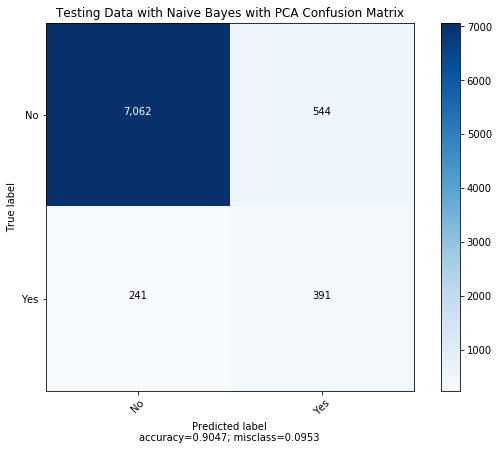

In [43]:
plot_confusion_matrix(cm = nbtestcm, 
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Testing Data with Naive Bayes with PCA Confusion Matrix")

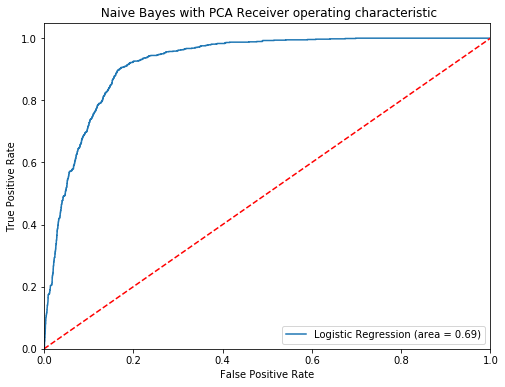

In [44]:
logit_roc_auc = roc_auc_score(y_target, nbclf.predict(y_test_pca))
fpr, tpr, thresholds = roc_curve(y_target, nbclf.predict_proba(y_test_pca)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Naive Bayes with PCA Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [47]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(x_train_pca, x_target)
ldpreds_train = ldclf.predict(x_train_pca)
ldpre_test = ldclf.predict(y_test_pca)

print('Training accuracy:', ldclf.score(x_train_pca, x_target))
print('')
print(classification_report(ldpreds_train, x_target))
ldtraincm = confusion_matrix(ldpreds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", ldtraincm)

print('\nTest accuracy:', ldclf.score(y_test_pca, y_target))
print('')
print(classification_report(ldpre_test, y_target))
ldtestcm = confusion_matrix(ldpre_test, y_target)
print("Predict Test Data with Actual Test Data: \n", ldtestcm)

Training accuracy: 0.9047040971168437

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30433
           1       0.42      0.61      0.50      2517

    accuracy                           0.90     32950
   macro avg       0.69      0.77      0.72     32950
weighted avg       0.92      0.90      0.91     32950

Predict Training Data with Actual Training Data: 
 [[28269  2164]
 [  976  1541]]

Test accuracy: 0.9060451565914057

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7559
           1       0.45      0.62      0.52       679

    accuracy                           0.91      8238
   macro avg       0.71      0.78      0.73      8238
weighted avg       0.92      0.91      0.91      8238

Predict Test Data with Actual Test Data: 
 [[7044  515]
 [ 259  420]]


## SVD

In [48]:
u, s, vt = np.linalg.svd(x_train, full_matrices=False)

In [49]:
print(s)
#originalTD = np.dot(u, np.dot(np.diag(s), vt))
#print(originalTD)

[955572.175  47168.161  32307.338   1899.709    868.694    508.213    385.281    160.782    125.62     120.14
    102.063    101.423     96.046     93.561     92.818     91.035     85.884     82.591     81.849     80.544
     80.185     78.692     68.756     66.968     65.045     61.828     57.266     51.841     49.322     47.955
     46.388     46.22      42.278     39.284     38.319     36.546     33.771     32.696     29.657     28.211
     27.748     25.044     24.299     22.181     19.982     16.586     16.28      12.318     12.092      8.978
      3.85       2.12       0.12       0.         0.         0.         0.         0.         0.         0.
      0.         0.         0.   ]


In [50]:
#print(originalTD,"\n")
# But, the goal of SVD is to use a smaller number of dimensions each of which 
# represent a latent variable capturing some cobminations of features associated 
# with the data (e.g., general themes in the documents). 

numDimensions = 7
u_ld = u[:, :numDimensions]
sigma = np.diag(s)[:numDimensions, :numDimensions]
vt_ld = vt[:numDimensions, :]
x_train_svd = np.dot(u_ld, np.dot(sigma, vt_ld))
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(x_train_svd)

[[ 40.02  94.     2.01 ...   0.01   0.99  -0.  ]
 [ 31.01 116.     4.   ...   0.29   0.71   0.  ]
 [ 59.01  13.     5.99 ...   0.3    0.7    0.  ]
 ...
 [ 35.01 194.     0.99 ...   0.09  -0.     0.91]
 [ 40.   295.     2.   ...   0.02   0.98  -0.  ]
 [ 28.98 333.     2.01 ...   0.01   0.99  -0.  ]]


In [51]:
y_u, y_s, y_vt = np.linalg.svd(y_test, full_matrices=False)
numDimensions = 7
y_u_ld = y_u[:, :numDimensions]
y_sigma = np.diag(y_s)[:numDimensions, :numDimensions]
y_vt_ld = y_vt[:numDimensions, :]
y_test_svd = np.dot(y_u_ld, np.dot(y_sigma, y_vt_ld))
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(y_test_svd)
print(y_test)

[[  56.99  371.      1.   ...    0.3     0.7     0.  ]
 [  55.01  285.      2.01 ...    0.02    0.98   -0.  ]
 [  33.01   52.      0.99 ...    0.29    0.71    0.  ]
 ...
 [  45.98  142.     11.99 ...    0.28    0.72    0.  ]
 [  30.98 1327.      2.   ...   -0.01    1.      0.  ]
 [  58.98  191.      2.01 ...    0.03    0.97   -0.  ]]
[[  57.  371.    1. ...    1.    0.    0.]
 [  55.  285.    2. ...    0.    1.    0.]
 [  33.   52.    1. ...    1.    0.    0.]
 ...
 [  46.  142.   12. ...    1.    0.    0.]
 [  31. 1327.    2. ...    0.    1.    0.]
 [  59.  191.    2. ...    0.    1.    0.]]


In [52]:
logreg=LogisticRegression(penalty="none", solver = "lbfgs")
logreg.fit(x_train_svd, x_target)
preds_train = logreg.predict(x_train_svd)
print(preds_train)
#print(logreg.score(preds_test, y))
print('Coefficient of each feature: \n\n', logreg.coef_)
print('\nTraining accuracy:', logreg.score(x_train_svd, x_target))
print('\nTest accuracy:', logreg.score(y_test_svd, y_target))

[0 0 0 ... 1 0 0]
Coefficient of each feature: 

 [[ 0.    0.   -0.05 -0.    0.03 -0.27  0.15  0.04 -0.28 -0.    0.   -0.01 -0.   -0.    0.    0.   -0.   -0.    0.
  -0.    0.   -0.   -0.   -0.01  0.01  0.   -0.   -0.   -0.    0.    0.   -0.    0.01  0.    0.02 -0.02 -0.   -0.
   0.    0.01  0.    0.   -0.    0.03 -0.02  0.01 -0.    0.   -0.03 -0.01  0.    0.02 -0.    0.01  0.01  0.    0.
   0.    0.   -0.    0.02 -0.02  0.  ]]

Training accuracy: 0.9081942336874052

Test accuracy: 0.909686817188638


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### GaussianNB

In [53]:
nbclf = GaussianNB()
nbclf = nbclf.fit(x_train_svd, x_target)
nbpreds_train = nbclf.predict(x_train_svd)
#print('Coefficient of each feature:', nbclf.get_params())
print('Training accuracy:', nbclf.score(x_train_svd, x_target))
print('')
print(classification_report(nbpreds_train, x_target))
nbtraincm = confusion_matrix(nbpreds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", nbtraincm)


nbpreds_test = nbclf.predict(y_test_svd)
print(nbpreds_test)
print('Test accuracy:', nbclf.score(y_test_svd, y_target))
print(classification_report(nbpreds_test, y_target))
nbtestcm = confusion_matrix(nbpreds_test, y_target)
print("Predict Test Data with Actual Test Data: \n", nbtestcm)

Training accuracy: 0.8650075872534143

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     27789
           1       0.60      0.43      0.50      5161

    accuracy                           0.87     32950
   macro avg       0.75      0.69      0.71     32950
weighted avg       0.85      0.87      0.86     32950

Predict Training Data with Actual Training Data: 
 [[26293  1496]
 [ 2952  2209]]
[1 0 0 ... 0 0 0]
Test accuracy: 0.8611313425588735
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6923
           1       0.59      0.42      0.49      1315

    accuracy                           0.86      8238
   macro avg       0.74      0.68      0.71      8238
weighted avg       0.85      0.86      0.85      8238

Predict Test Data with Actual Test Data: 
 [[6541  382]
 [ 762  553]]


### LDA

In [54]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(x_train_svd, x_target)

ldpreds_train = ldclf.predict(x_train_svd)
ldpre_test = ldclf.predict(y_test_svd)

print('Training accuracy:', ldclf.score(x_train_svd, x_target))
print('')
print(classification_report(ldpreds_train, x_target))
ldtraincm = confusion_matrix(ldpreds_train, x_target)
print("Predict Training Data with Actual Training Data: \n", ldtraincm)

print('\nTest accuracy:', ldclf.score(y_test_svd, y_target))
print('')
print(classification_report(ldpre_test, y_target))
ldtestcm = confusion_matrix(ldpre_test, y_target)
print("Predict Test Data with Actual Test y_target: \n", ldtestcm)

Training accuracy: 0.9064036418816388

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30371
           1       0.43      0.62      0.51      2579

    accuracy                           0.91     32950
   macro avg       0.70      0.78      0.73     32950
weighted avg       0.92      0.91      0.91     32950

Predict Training Data with Actual Training Data: 
 [[28266  2105]
 [  979  1600]]

Test accuracy: 0.8990046127700898

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7311
           1       0.55      0.56      0.55       927

    accuracy                           0.90      8238
   macro avg       0.75      0.75      0.75      8238
weighted avg       0.90      0.90      0.90      8238

Predict Test Data with Actual Test y_target: 
 [[6891  420]
 [ 412  515]]


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## SVM

For the Support Vector Machines result. SVM focused on separate differences in the classes of data by using separating hyperplane.Due to not being sure about our data pattern in high dimensions, We compared the training accuracy and the testing accuracy for the linear kernel SVM and radial basis function kernel SVM. Moreover, we also tested 5 different inverse of regularization strength numbers from C = [10, 1, 0.1, 0.001] in our radial basis function kernel.
First, in linear kernel SVM, C doesn’t affect any accuracy, precision and recall so we chose the inverse of regularization strength number equal one. Our model performed 88.6 % accuracy in both training data and testing dataset. Similarly, in the radial basis function kernel SVM, we also chose the inverse of regularization strength number equal one, Our model performed 95.9 % accuracy in training data and 89.4% accuracy in testing dataset. Comparing two models, we  discovered that SVM with a radial basis function kernel has better performance on training and test data. Furthermore, the Precision and recall both had high percent performance and on the confusion matrix, general performed well, but for false positive has 677 wrong classified, which meant the client didn’t subscribe a term deposit, but classify as subscribed, it had an amount of number  so we have to think how to improve in future. Finally, in our SVM ROC curve, it raised its threshold and became flatten after the true positive rate over 0.8.

In [115]:
C=[10,5,1,0.1,.01]
for c in C:   
    from sklearn.svm import SVC # "Support vector classifier"
    print(c)
    model = SVC(kernel='linear', probability=True)
    model.fit(x_train,x_target)
    model_train = model.predict(x_train)
    print(model_train)
    model_test = model.predict(y_test)
    print(model_test)

    print('Training accuracy:', model.score(x_train, x_target))
    print('')
    print(classification_report(model_train, x_target))
    SVCtraincm = confusion_matrix(model_train, x_target)
    print("Predict Training Data with Actual Training Data: \n", SVCtraincm)

    print('\nTest accuracy:', model.score(y_test, y_target))
    print('')
    print(classification_report(model_test, y_target))
    SVCtestcm = confusion_matrix(model_test, y_target)
    print("Predict Test Data with Actual Test Data: \n", SVCtestcm)

10
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]
Training accuracy: 0.886525037936267

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     29632
           1       0.44      0.49      0.47      3318

    accuracy                           0.89     32950
   macro avg       0.69      0.71      0.70     32950
weighted avg       0.89      0.89      0.89     32950

Predict Training Data with Actual Training Data: 
 [[27569  2063]
 [ 1676  1642]]

Test accuracy: 0.8875940762320952

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7387
           1       0.46      0.51      0.48       851

    accuracy                           0.89      8238
   macro avg       0.70      0.72      0.71      8238
weighted avg       0.89      0.89      0.89      8238

Predict Test Data with Actual Test Data: 
 [[6882  505]
 [ 421  430]]
5
[0 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]
Training accuracy: 0.886525037936267

     

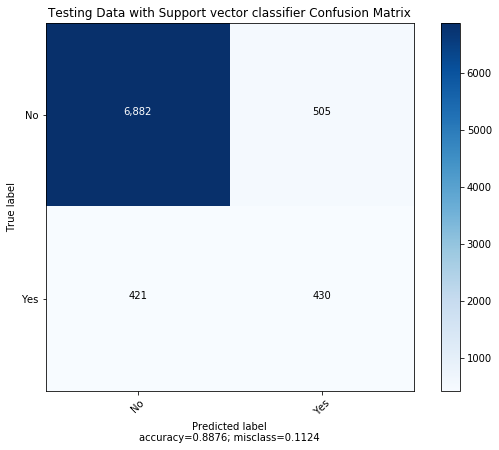

In [105]:
plot_confusion_matrix(cm = SVCtestcm, 
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Testing Data with Support vector classifier Confusion Matrix")

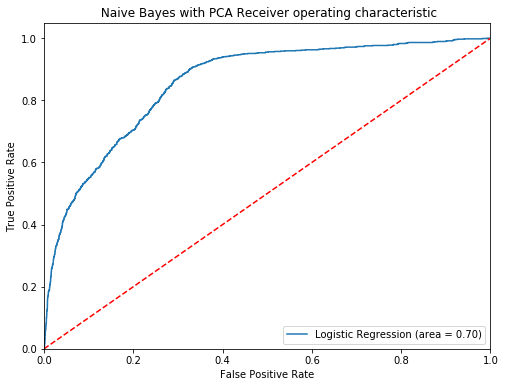

In [106]:
logit_roc_auc = roc_auc_score(y_target, model.predict(y_test))
fpr, tpr, thresholds = roc_curve(y_target, model.predict_proba(y_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Naive Bayes with PCA Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [116]:
C=[10,5,1,0.1,.01]
for c in C:   
    clf = SVC(kernel='rbf', C =c)
    clf.fit(x_train,x_target)

    clf_train = clf.predict(x_train)
    print(clf_train)
    clf_test = clf.predict(y_test)
    print(clf_test)

    print('Training accuracy:', clf.score(x_train, x_target))
    print('')
    print(classification_report(clf_train, x_target))
    SVClftraincm = confusion_matrix(clf_train, x_target)
    print("Predict Training Data with Actual Training Data: \n", SVClftraincm)

    print('\nTest accuracy:', clf.score(y_test, y_target))
    print('')
    print(classification_report(clf_test, y_target))
    SVClftestcm = confusion_matrix(clf_test, y_target)
    print("Predict Test Data with Actual Test Data: \n", SVClftestcm)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]
Training accuracy: 0.9974506828528072

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29319
           1       0.98      1.00      0.99      3631

    accuracy                           1.00     32950
   macro avg       0.99      1.00      0.99     32950
weighted avg       1.00      1.00      1.00     32950

Predict Training Data with Actual Training Data: 
 [[29240    79]
 [    5  3626]]

Test accuracy: 0.885773245933479

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7530
           1       0.38      0.50      0.43       708

    accuracy                           0.89      8238
   macro avg       0.66      0.71      0.68      8238
weighted avg       0.90      0.89      0.89      8238

Predict Test Data with Actual Test Data: 
 [[6946  584]
 [ 357  351]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]
Training accuracy: 0.9892564491654021

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29571
           1       0.91      1.00      0.95      3379

    accuracy                           0.99     32950
   macro avg       0.95      0.99      0.97     32950
weighted avg       0.99      0.99      0.99     32950

Predict Training Data with Actual Training Data: 
 [[29231   340]
 [   14  3365]]

Test accuracy: 0.891964068948774

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7601
           1       0.36      0.54      0.43       637

    accuracy                           0.89      8238
   macro avg       0.66      0.73      0.69      8238
weighted avg       0.91      0.89      0.90      8238

Predict Test Data with Actual Test Data: 
 [[7007  594]
 [ 296  341]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]
Training accuracy: 0.9599393019726858

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     30293
           1       0.68      0.95      0.79      2657

    accuracy                           0.96     32950
   macro avg       0.84      0.95      0.89     32950
weighted avg       0.97      0.96      0.96     32950

Predict Training Data with Actual Training Data: 
 [[29109  1184]
 [  136  2521]]

Test accuracy: 0.894027676620539

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7784
           1       0.28      0.57      0.37       454

    accuracy                           0.89      8238
   macro avg       0.62      0.74      0.66      8238
weighted avg       0.93      0.89      0.91      8238

Predict Test Data with Actual Test Data: 
 [[7107  677]
 [ 196  258]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Training accuracy: 0.887556904400607

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     32950
           1       0.00      0.00      0.00         0

    accuracy                           0.89     32950
   macro avg       0.50      0.44      0.47     32950
weighted avg       1.00      0.89      0.94     32950

Predict Training Data with Actual Training Data: 
 [[29245  3705]
 [    0     0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Test accuracy: 0.8865015780529255

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      8238
           1       0.00      0.00      0.00         0

    accuracy                           0.89      8238
   macro avg       0.50      0.44      0.47      8238
weighted avg       1.00      0.89      0.94      8238

Predict Test Data with Actual Test Data: 
 [[7303  935]
 [   0    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Training accuracy: 0.887556904400607

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     32950
           1       0.00      0.00      0.00         0

    accuracy                           0.89     32950
   macro avg       0.50      0.44      0.47     32950
weighted avg       1.00      0.89      0.94     32950

Predict Training Data with Actual Training Data: 
 [[29245  3705]
 [    0     0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



Test accuracy: 0.8865015780529255

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      8238
           1       0.00      0.00      0.00         0

    accuracy                           0.89      8238
   macro avg       0.50      0.44      0.47      8238
weighted avg       1.00      0.89      0.94      8238

Predict Test Data with Actual Test Data: 
 [[7303  935]
 [   0    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [120]:
clf = SVC(kernel='rbf', C =1, probability=True)
clf.fit(x_train,x_target)
clf_train = clf.predict(x_train)
print(clf_train)
clf_test = clf.predict(y_test)
print(clf_test)

print('Training accuracy:', clf.score(x_train, x_target))
print('')
print(classification_report(clf_train, x_target))
SVClftraincm = confusion_matrix(clf_train, x_target)
print("Predict Training Data with Actual Training Data: \n", SVClftraincm)

print('\nTest accuracy:', clf.score(y_test, y_target))
print('')
print(classification_report(clf_test, y_target))
SVClftestcm = confusion_matrix(clf_test, y_target)
print("Predict Test Data with Actual Test Data: \n", SVClftestcm)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]
Training accuracy: 0.9599393019726858

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     30293
           1       0.68      0.95      0.79      2657

    accuracy                           0.96     32950
   macro avg       0.84      0.95      0.89     32950
weighted avg       0.97      0.96      0.96     32950

Predict Training Data with Actual Training Data: 
 [[29109  1184]
 [  136  2521]]

Test accuracy: 0.894027676620539

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7784
           1       0.28      0.57      0.37       454

    accuracy                           0.89      8238
   macro avg       0.62      0.74      0.66      8238
weighted avg       0.93      0.89      0.91      8238

Predict Test Data with Actual Test Data: 
 [[7107  677]
 [ 196  258]]


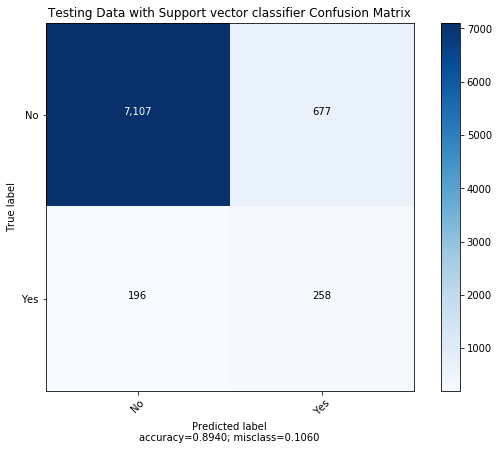

In [121]:
plot_confusion_matrix(cm = SVClftestcm, 
                      normalize    = False,
                      target_names = ['No', 'Yes'],
                      title        = "Testing Data with Support vector classifier Confusion Matrix")

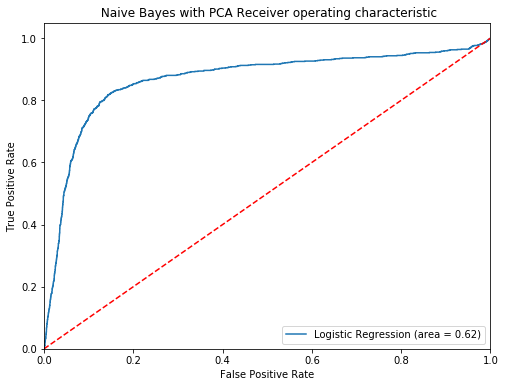

In [122]:
logit_roc_auc = roc_auc_score(y_target, clf.predict(y_test))
fpr, tpr, thresholds = roc_curve(y_target, clf.predict_proba(y_test)[:,1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Naive Bayes with PCA Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()